<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/Quartile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign7: MissingValue/MICE+MissForest.xlsx')
df = df.iloc[:, 1:]
df

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,L14:WBC,Sex,Age,NATNL,Location,PricipalProblemCode,PricipalProblemName,InPatient,OutPatient,Emergency
0,2299,5812902,-7.158596,100,100,34,0,0,0,0,...,9.410000,หญิง,75,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,239873007,Osteoarthritis of knee,0,1,0
1,2299,6947220,5.550691,35,0,1,35,0,0,0,...,6.202946,หญิง,76,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,239873007,Osteoarthritis of knee,0,1,0
2,2299,8186767,-6.063710,100,0,15,0,0,0,0,...,5.420000,หญิง,78,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,239873007,Osteoarthritis of knee,0,1,0
3,2299,9385133,-12.812245,90,0,0,0,0,0,0,...,7.265258,หญิง,79,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,F411,Generalized anxiety disorder,0,1,0
4,2304,4916314,28.287500,0,0,0,0,0,0,0,...,6.704847,หญิง,58,ไทย,หน่วยทะเบียนกลาง(Test พิเศษ)เวชศาสตร์ชันสูตร,None,None,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,3319961,10553903,10.568365,0,0,0,0,0,0,0,...,6.742022,ชาย,64,ไทย,หน่วยคลินิกพิเศษศูนย์บริการทางการแพทย์ชั้นเลิศ,44054006,Type 2 diabetes mellitus,0,1,0
52615,3319971,10553916,-4.256753,0,0,0,0,0,0,0,...,7.802948,หญิง,72,ไทย,หน่วยคลินิกพิเศษศูนย์บริการทางการแพทย์ชั้นเลิศ,44054006,Type 2 diabetes mellitus,0,1,0
52616,3320048,10572126,-0.692078,0,0,0,0,0,0,0,...,8.032939,ชาย,67,ไทย,TB (คลินิก)-D707,A150,"Tuberculosis of lung\, confirmed by sputum mic...",0,1,0
52617,3320050,10572565,7.217875,0,0,0,0,0,0,0,...,18.700000,ชาย,68,ไทย,โรคเลือดและต่อมน้ำเหลือง (คลินิก)-D716,414166008,"Extranodal NK/T-cell lymphoma, nasal type",0,1,0


In [5]:
df = df[['PatientUID','PatientVisitUID','Slopes']]
df

,PatientUID,PatientVisitUID,Slopes
0,2299,5812902,-7.158596
1,2299,6947220,5.550691
2,2299,8186767,-6.063710
3,2299,9385133,-12.812245
4,2304,4916314,28.287500
...,...,...,...
52614,3319961,10553903,10.568365
52615,3319971,10553916,-4.256753
52616,3320048,10572126,-0.692078
52617,3320050,10572565,7.217875


In [6]:
df.isnull().any()

PatientUID         False
PatientVisitUID    False
Slopes             False
dtype: bool

In [7]:
import numpy as np

# Desired quartiles and median
desired_Q1 = (-np.inf, -1)
desired_Q2 = (-1, 0)
desired_Q3 = (0, 1)
desired_Q4 = (1, np.inf)

# Create a function to categorize the slopes
def categorize_slope(s):
    if s <= desired_Q1[1]:
        return 'Q1'
    elif desired_Q1[1] < s <= desired_Q2[1]:
        return 'Q2'
    elif desired_Q2[1] < s <= desired_Q3[1]:
        return 'Q3'
    else:
        return 'Q4'

# Apply the categorization function to create a new column
df['SlopeCategory'] = df['Slopes'].apply(categorize_slope)

<ipython-input-7-2641bc34735f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SlopeCategory'] = df['Slopes'].apply(categorize_slope)


In [8]:
df

,PatientUID,PatientVisitUID,Slopes,SlopeCategory
0,2299,5812902,-7.158596,Q1
1,2299,6947220,5.550691,Q4
2,2299,8186767,-6.063710,Q1
3,2299,9385133,-12.812245,Q1
4,2304,4916314,28.287500,Q4
...,...,...,...,...
52614,3319961,10553903,10.568365,Q4
52615,3319971,10553916,-4.256753,Q1
52616,3320048,10572126,-0.692078,Q2
52617,3320050,10572565,7.217875,Q4


## **check**

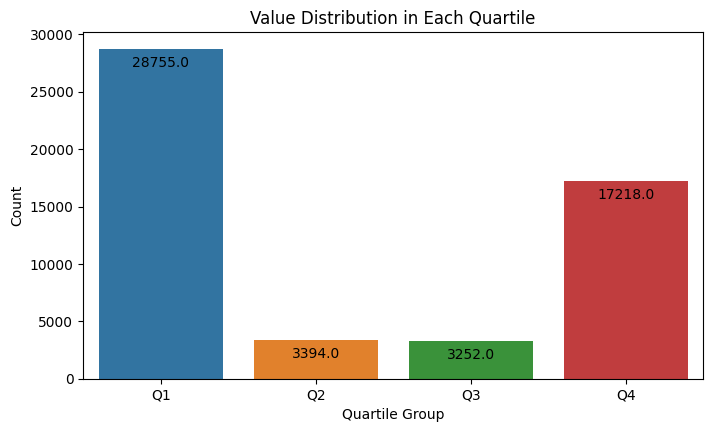

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

quartile_counts = df['SlopeCategory'].value_counts()
desired_order = ['Q1', 'Q2', 'Q3', 'Q4']

# Step 2: Create a bar plot to visualize the quartile distribution with actual counts on top of each bar
plt.figure(figsize=(8, 4.5))
ax = sns.barplot(x=quartile_counts.index, y=quartile_counts.values, order=desired_order)
plt.xlabel('Quartile Group')
plt.ylabel('Count')
plt.title('Value Distribution in Each Quartile')

# Display the counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, -10), textcoords='offset points')
plt.show()

In [10]:
df.groupby('SlopeCategory')['Slopes'].agg(['min', 'max'])

,min,max
SlopeCategory,,
Q1,-79.002653,-1.000000
Q2,-1.000000,0.000000
Q3,0.002128,1.000000
Q4,1.000000,106.892857


# **Excel**

In [ ]:
quartile.to_excel("Quartile.xlsx", index=False)